In [1]:
import os, sys
sys.path.insert(0, os.path.abspath('/home/tguethle/Documents/spi/Master_Thesis/main_files/'))

from CustomAstromodels import *
import numpy as np
import matplotlib.pyplot as plt

11:59:28 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=27857;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=474591;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=38926;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=182520;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

         WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=223044;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=224854;file:///home/tguethle/.opt/conda/envs/spi39/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

In [9]:
x = np.geomspace(20, 1000, 200)
band = C_Band()
y = band.evaluate(x, 7e-4, -1.5, 500, -3.2, 100)

beuermann = Beuermann()
y2 = beuermann.evaluate(x, 7e-4, -1.5, -3, 1, 100, 100)
y3 = beuermann.evaluate(x, 7e-4, -1.5, -1.2, 1.2, 100, 200)

0.0007 -1.5 -3 1 100 100
0.0007 -1.5 -1.2 1.2 100 200


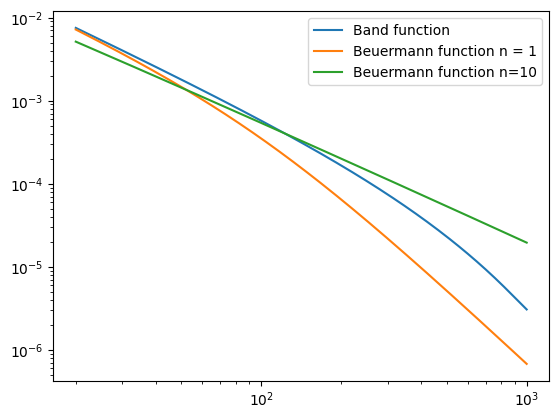

In [10]:
fig, ax = plt.subplots()

ax.set_xscale('log')
ax.set_yscale('log')
ax.plot(x, y, label='Band function')
ax.plot(x, y2, label='Beuermann function n = 1')
ax.plot(x, y3, label='Beuermann function n=10')
ax.legend()

In [4]:

def beuermann(E, norm1=0.1, i1=1.32,i2=2.88,E1=30,E2 = 30,n1=1,k1 = 1,k2 = 1):
    return norm1*np.power(k1*np.power(E/E1,i1*n1)+k2*np.power(E/E2,i2*n1),-1/n1)